<a href="https://colab.research.google.com/github/shahansh22/diabetes-prediction-cnn/blob/main/Ensemble_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load saved models
mobilenet_model = load_model('/content/drive/MyDrive/images/MobileNet.h5')
inception_model = load_model('/content/drive/MyDrive/images/InceptionV3.h5')
densenet_model = load_model('/content/drive/MyDrive/images/DenseNet121.h5')

# Define path to test images
test_folder = '/content/drive/MyDrive/images/test_images/'
test_csv= '/content/drive/MyDrive/images/test_images/test_labels.csv'
test=pd.read_csv(test_csv)
test["image"] = test["image"].apply(lambda x: x + ".jpeg")

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
        dataframe=test,
        directory = test_folder,
        x_col="image",
        target_size=(244, 244),
        batch_size=1,
        shuffle=False,
        class_mode=None,
        )

Found 1581 validated image filenames.


In [ ]:
# Generate predictions for each model
model1_preds = mobilenet_model.predict(test_generator)
model2_preds = inception_model.predict(test_generator)

1581/1581 [==============================] - 380s 239ms/step


In [ ]:
model3_preds = densenet_model.predict(test_generator)

1581/1581 [==============================] - 436s 274ms/step


In [ ]:
from sklearn.linear_model import LogisticRegression
all_model_pred=[]
all_model_preds = np.concatenate((model1_preds, model2_preds, model3_preds), axis=1)
# Fit logistic regression on combined predictions
logreg = LogisticRegression(max_iter=1000)
logreg.fit(all_model_preds, test['level'])  # Assuming 'label' is the column containing the target labels

# Predict using the logistic regression model
ensemble_preds = logreg.predict(all_model_preds)

In [ ]:
# Print shapes for debugging
#print("Shape of true_classes:", true_classes.shape)
print("Shape of all_predictions:", np.array(all_model_preds).shape)

Shape of true_classes: (1581,)
Shape of all_predictions: (1581, 1)


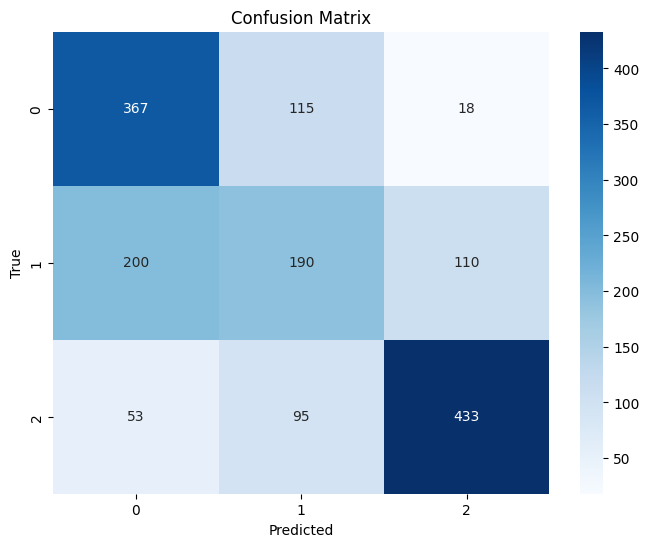

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
test_csv = pd.read_csv('/content/drive/MyDrive/images/test_images/test_labels.csv')

# Extract the true class labels
true_classes = test_csv['level'].values
# Plot confusion matrix
cm = confusion_matrix(true_classes, ensemble_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
accuracy = accuracy_score(true_classes, ensemble_preds)
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.6261859582542695
